<h1><center>Worked Problem 7</center></h1>

<h3><center>Cesarine Graham</center></h3>

Before I begin this problem, I want to quickly overlay what I will be analyzing. Previously, we've developed an equation for the number of ways we can arrange a small amount of quanta on a small number of oscillators. The formula we developed for arranging $q$ on $N$ oscillators is given below:

$$\Omega = \dfrac{(q+N-1)!}{q!(N-1)!}$$

Remember that a particular arrangement of quanta on oscillators is a microstate. That is, atom 1 has 3 oscillators with 1 quanta each on oscillator 1 and oscillator 2. But another microstate with quanta each on oscillator 2 and 3 would be the same energy macrostate for atom 1. We typically use energy for our marker for macrostates, but this doesn't have to be the case because micro and macrostate ideas apply well beyond thermal physics to information theory, data science, networks, and general probability theory.

Before we computed the number of ways for a pair of systems, showing that multiplying the ways was how to find the total number. Here we consider the number of total atoms as given, so the number of ways is a function of the number of energy quanta distributed on atom 1 ($q_1$) and the total available ($q_{tot}$).

$$\Omega_T(q_{tot}, q_1, q_2, q_3) = \Omega_1(q_1) \cdot \Omega_2(q_{tot} - q_1 - q_2) \cdot \Omega_3(q_{tot} - q_1 - q_2 - q_3)$$

This formula represents the total number of ways to distribute the quanta on the three oscillators of atom 1, where Ω_1(q_1) is the number of ways to distribute q1 quanta on oscillator 1, Ω_2(q_{tot} - q_1 - q_2) is the number of ways to distribute the remaining quanta on oscillator 2, and Ω_3(q_{tot} - q_1 - q_2 - q_3) is the number of ways to distribute the remaining quanta on oscillator 3.

Our goal is to compute the number of total ways to distribute $q_1$ quanta given $q_{tot}$ available and plotting the distribution $\Omega_T$ as a function of $q_1$.

In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as sc #boltzmann constant
from mpl_toolkits.mplot3d import Axes3D

**Compute the number of ways given a $q$ and $N$**

In [2]:
def calculate_ways(q, N):
    """
    Calculate the number of ways to arrange q quanta on N oscillators.
    
    Parameters:
    q (int or array): Number of quanta
    N (int): Number of oscillators
    
    Returns:
    int or array: Number of ways to arrange q quanta on N oscillators
    """
    condition = (q < 0) | (N < 0)
    ways = np.where(condition, 0, np.math.factorial(q + N - 1) / (np.math.factorial(q) * np.math.factorial(N - 1)))
    return ways

# Test the function on small q and N
test_q = 3
test_N = 4
test_result = calculate_ways(test_q, test_N)
print(f"Number of ways for q={test_q} and N={test_N}: {test_result}")

Number of ways for q=3 and N=4: 20.0


**Calculate the total number of ways for the given setup of three blocks.**

Consider three blocks of material made of simple atomic oscillators that can take on quanta of energy. Each block has 200 such atoms and there are 600 quanta of energy that can be distributed between the three blocks. We will also consider another scenario, with three block that have 100, 100, and 250 atoms where there are 700 quanta of energy that can be distributed.

In [3]:
def total_ways(q_tot, q1_range, N1, N2, N3):
    """
    Calculate the total number of ways to distribute q quanta among three blocks.
    
    Parameters:
    q_tot (int): Total number of quanta
    q1_range (range): Range of q1 values to consider
    N1 (int): Number of oscillators in block 1
    N2 (int): Number of oscillators in block 2
    N3 (int): Number of oscillators in block 3
    
    Returns:
    tuple: Tuple containing lists of ways for each block for each q1 value in the given range
    """
    ways_list_1 = [calculate_ways(q1, N1) for q1 in q1_range]
    ways_list_2 = [calculate_ways(q_tot - q1, N2) for q1 in q1_range]
    ways_list_3 = [calculate_ways(q_tot - q1 - q2, N3) for q1, q2 in zip(q1_range, (q_tot - q1 for q1 in q1_range))]
    ways_list_total = [w1 * w2 * w3 for w1, w2, w3 in zip(ways_list_1, ways_list_2, ways_list_3)]
    return ways_list_1, ways_list_2, ways_list_3, ways_list_total

# Test the modified function with a small range of q1 values for three blocks
q_tot_test_1 = 600
q1_range_test = range(q_tot_test_1 + 1)
N1_test = 200
N2_test = 200
N3_test = 200
total_ways_test_1 = total_ways(q_tot_test_1, q1_range_test, N1_test, N2_test, N3_test)
print(f"Total ways for q_tot={q_tot_test_1}, N1={N1_test}, N2={N2_test}, N3={N3_test} will be plotted below.")

# Test the modified function with a small range of q1 values for three blocks
q_tot_test_2 = 700
q2_range_test = range(q_tot_test_2 + 1)
N1_test = 100
N2_test = 250
N3_test = 250
total_ways_test_2 = total_ways(q_tot_test_2, q2_range_test, N1_test, N2_test, N3_test)
print(f"Total ways for q_tot={q_tot_test_2}, N1={N1_test}, N2={N2_test}, N3={N3_test} will be plotted below.")

Total ways for q_tot=600, N1=200, N2=200, N3=200 will be plotted below.
Total ways for q_tot=700, N1=100, N2=250, N3=250 will be plotted below.


**Plot the distribution of the number of ways for the given setups**

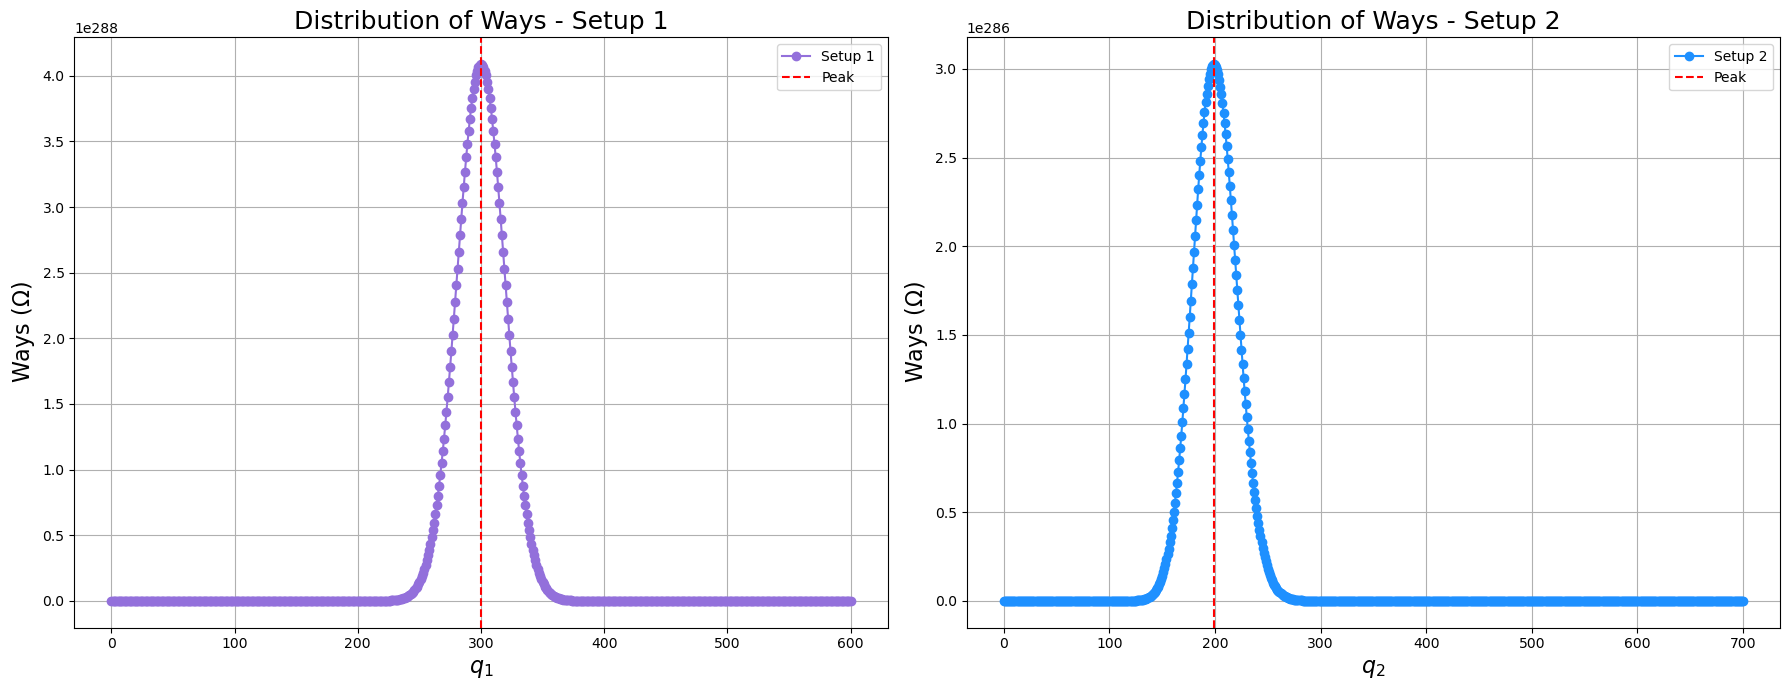

In [4]:
plt.figure(figsize=(18, 7))

# Plot for Test Setup 1
plt.subplot(1, 2, 1)
plt.plot(q1_range_test, total_ways_test_1[3], marker='o', color='mediumpurple', label='Setup 1')
plt.axvline(x=q1_range_test[np.argmax(total_ways_test_1[3])], color='red', linestyle='--', label='Peak')
plt.grid()
plt.xlabel('$q_1$', fontsize=16) 
plt.ylabel('Ways ($\Omega$)', fontsize=16)  
plt.title('Distribution of Ways - Setup 1', fontsize=18)  
plt.legend()

# Plot for Test Setup 2
plt.subplot(1, 2, 2)
plt.plot(q2_range_test, total_ways_test_2[3], marker='o', color='dodgerblue', label='Setup 2')
plt.axvline(x=q2_range_test[np.argmax(total_ways_test_2[3])], color='red', linestyle='--', label='Peak')
plt.grid()
plt.xlabel('$q_2$', fontsize=16)  
plt.ylabel('Ways ($\Omega$)', fontsize=16)  
plt.title('Distribution of Ways - Setup 2', fontsize=18) 
plt.legend()

plt.tight_layout()
plt.show()

The graph illustrates the distribution of ways $\Omega$ as a function of the number of quanta $q_1$ or $q_2$ for two different setups (Setup 1 and Setup 2). 

The curve depicts how the number of ways changes with different configurations of quanta on oscillators. The peaks of the curves represent the configurations with the highest number of ways. The vertical dashed line at the peak indicates the specific value of $q_1$ or $q_2$ where the distribution reaches its maximum. This is the most probable configuration in terms of the number of ways. By comparing the two subplots (Setup 1 and Setup 2), we can observe differences in the distributions. This comparison provides insights into how varying the number of atoms, oscillators, or total quanta influences the ways these quanta can be distributed. Lastly, the shape of the curve and the position of the peak offer quantitative information about the most probable configurations and the overall distribution of ways. For example, a broader curve implies a wider range of probable configurations.

We will now perform entropy calculations on the two setups.

**Entropy Calculations**

C:\Users\cesay\AppData\Local\Temp\ipykernel_24048\1603439040.py:18: RuntimeWarning: overflow encountered in multiply
  ways_list_total = [w1 * w2 * w3 for w1, w2, w3 in zip(ways_list_1, ways_list_2, ways_list_3)]


Text(0.5, 1.0, 'Entropy of $\\Omega_T$')

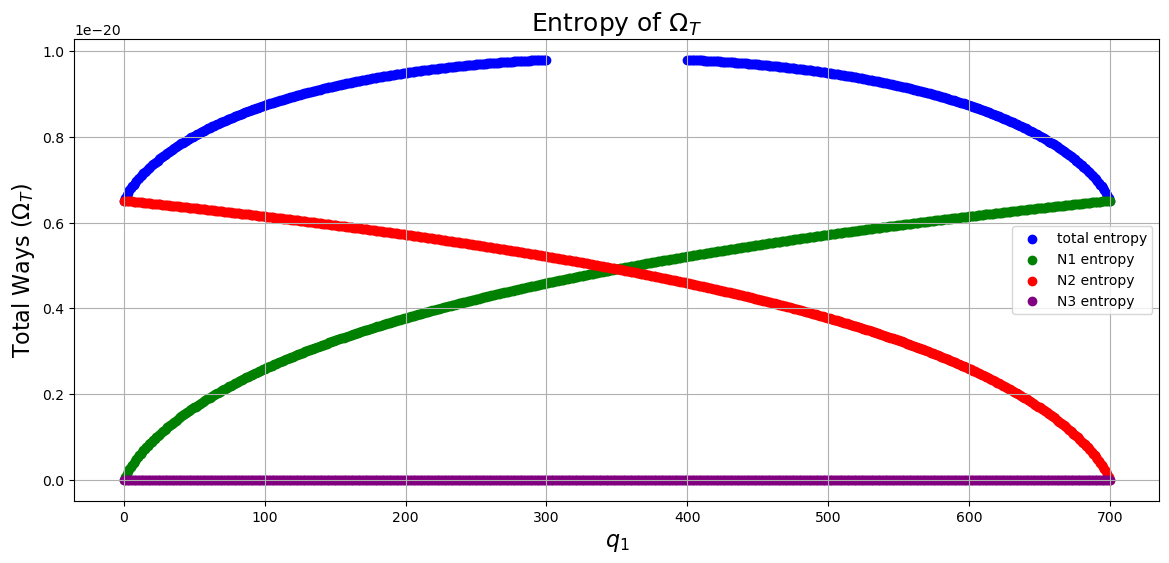

In [5]:
q_tot_test_2 = 700
q2_range_test = range(q_tot_test_2 + 1)
N1_test = 200
N2_test = 200
N3_test = 300
total_ways_test_2 = total_ways(q_tot_test_2, q2_range_test, N1_test, N2_test, N3_test)

entropy_total = sc.Boltzmann * np.log(total_ways_test_2[3])
entropy_n1 = sc.Boltzmann * np.log(total_ways_test_2[0])
entropy_n2 = sc.Boltzmann * np.log(total_ways_test_2[1])
entropy_n3 = sc.Boltzmann * np.log(total_ways_test_2[2])

# Plot the distribution
plt.figure(figsize=(14, 6))
plt.scatter(q2_range_test, entropy_total, color='blue', label = 'total entropy')
plt.scatter(q2_range_test, entropy_n1, color='green', label = 'N1 entropy')
plt.scatter(q2_range_test, entropy_n2, color='red', label = 'N2 entropy')
plt.scatter(q2_range_test, entropy_n3, color='purple', label = 'N3 entropy')
plt.grid()
plt.legend()
plt.xlabel('$q_1$', fontsize=16)
plt.ylabel('Total Ways ($\Omega_T$)', fontsize=16)
plt.title('Entropy of $\Omega_T$', fontsize=18)

The graph illustrates the entropy of the total ways $\Omega_T$ and the individual block entropies $\Omega_1$, $\Omega_2$, $\Omega_3$ as a function of the number of quanta $q_1$ for a given setup with three blocks of material. 

The blue curve represents the total entropy of the system, reflecting the overall disorder or uncertainty associated with the distribution of quanta among the three blocks. The entropy increases with the number of quanta, representing the growing number of possible arrangements and configurations. The green, red, and purple curves correspond to the entropies of individual blocks $N1, N2, N3$. Each block's entropy provides insights into the level of disorder within that specific block as the number of quanta changes. Higher entropy implies more possible configurations and greater disorder.By comparing the individual block entropies, we can see how the entropy varies across the different blocks. Variations in entropy indicate differences in the potential arrangements of quanta within each block. The overall trend of increasing entropy with the number of quanta is expected, as more quanta provide more ways to distribute and arrange energy among the oscillators.

In summary, the graph visually communicates how entropy changes concerning the distribution of quanta among three blocks of material. The total entropy and individual block entropies offer a comprehensive view of the system's disorder and the impact of changing the number of quanta on the overall entropy of the system.

C:\Users\cesay\AppData\Local\Temp\ipykernel_24048\1566891945.py:17: RuntimeWarning: invalid value encountered in divide
  return factorial(q + N - 1) / (factorial(q) * factorial(N - 1))
C:\Users\cesay\AppData\Local\Temp\ipykernel_24048\1566891945.py:17: RuntimeWarning: invalid value encountered in multiply
  return factorial(q + N - 1) / (factorial(q) * factorial(N - 1))


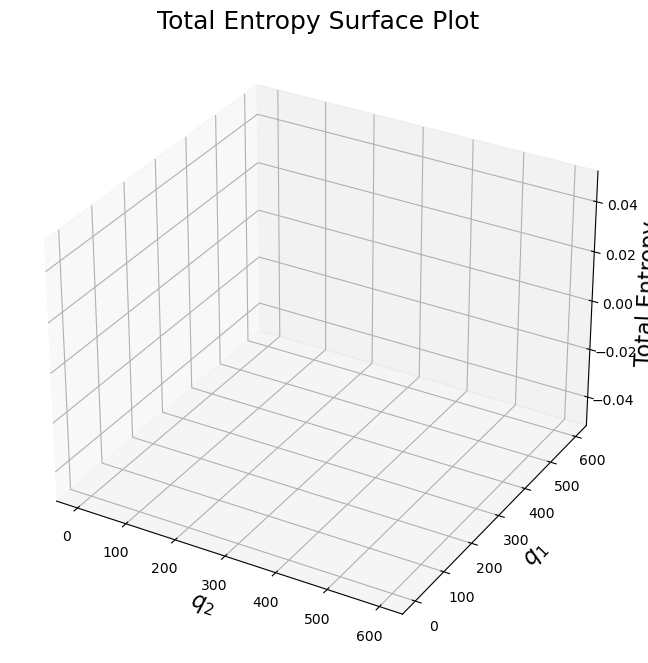

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import factorial

def calculate_ways(q, N):
    """
    Calculate the number of ways to arrange q quanta on N oscillators.

    Parameters:
    q (int or array): Number of quanta
    N (int): Number of oscillators

    Returns:
    int or array: Number of ways to arrange q quanta on N oscillators
    """
    return factorial(q + N - 1) / (factorial(q) * factorial(N - 1))

# Assuming you have a function to calculate entropy
def calculate_entropy(q1, q2, q3, N1, N2, N3):
    ways_total = calculate_ways(q1 + q2 + q3, N1 + N2 + N3)
    ways_n1 = calculate_ways(q1, N1)
    ways_n2 = calculate_ways(q2, N2)
    ways_n3 = calculate_ways(q3, N3)

    entropy_total = sc.Boltzmann * np.log(ways_total)
    entropy_n1 = sc.Boltzmann * np.log(ways_n1)
    entropy_n2 = sc.Boltzmann * np.log(ways_n2)
    entropy_n3 = sc.Boltzmann * np.log(ways_n3)

    return entropy_total, entropy_n1, entropy_n2, entropy_n3

# Create a meshgrid of q1 and q2 values
q1_range = np.linspace(0, q_tot_test_1, 100)
q2_range = np.linspace(0, q_tot_test_1, 100)
Q1, Q2 = np.meshgrid(q1_range, q2_range)

# Calculate q3 for each combination of q1 and q2
q3_values = q_tot_test_1 - Q1 - Q2

# Calculate entropy for each combination of q1, q2, and q3
entropy_total, _, _, _ = calculate_entropy(Q1, Q2, q3_values, N1_test, N2_test, N3_test)

# Plot 2D Surface
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Q2, Q1, entropy_total, cmap='viridis')

# Customize the plot
ax.set_xlabel('$q_2$', fontsize=16)
ax.set_ylabel('$q_1$', fontsize=16)
ax.set_zlabel('Total Entropy', fontsize=16)
ax.set_title('Total Entropy Surface Plot', fontsize=18)

plt.show()
